In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [9]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [3]:
# mutated chromosomes
chromosomes = None
with open('chromosomes/new_cromosomes_mutated.json') as f:
    chromosomes = json.load(f)

In [4]:
for key, value in chromosomes.items():
    chromosomes[key].append(chromosomes[key][0].count(0))
    chromosomes[key].append(chromosomes[key][0].count(1))
    chromosomes[key][1] = chromosomes[key][1]*100

In [5]:
# sort based on number of 0s
chromosomes = {k: v for k, v in sorted(chromosomes.items(), key=lambda item: (item[1][2]), reverse=True)}

In [10]:
original_model =  Sequential([

    Conv2D(64, 3,padding='same', input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3,padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
from test_train_data import x_train, y_train, x_test, y_test

In [11]:
original_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision','Recall'])

In [12]:
original_model.fit(x_train,y_train, epochs=10)

Epoch 1/10


2023-03-09 19:15:10.925650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-03-09 19:15:11.157874: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f2f089982c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-09 19:15:11.157936: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-03-09 19:15:11.164984: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-09 19:15:11.307294: I tensorflow/compiler/jit/xla_compilation_cache.cc:480] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


324/324 [==============================] - 6s 8ms/step - loss: 0.3788 - accuracy: 0.8315 - precision: 0.7576 - recall: 0.5169
Epoch 2/10
324/324 [==============================] - 2s 7ms/step - loss: 0.2103 - accuracy: 0.9183 - precision: 0.8449 - recall: 0.8398
Epoch 3/10
324/324 [==============================] - 2s 7ms/step - loss: 0.1621 - accuracy: 0.9379 - precision: 0.8853 - recall: 0.8744
Epoch 4/10
324/324 [==============================] - 2s 7ms/step - loss: 0.1250 - accuracy: 0.9538 - precision: 0.9088 - recall: 0.9142
Epoch 5/10
324/324 [==============================] - 2s 7ms/step - loss: 0.1019 - accuracy: 0.9641 - precision: 0.9290 - recall: 0.9331
Epoch 6/10
324/324 [==============================] - 2s 7ms/step - loss: 0.0827 - accuracy: 0.9691 - precision: 0.9409 - recall: 0.9402
Epoch 7/10
324/324 [==============================] - 2s 7ms/step - loss: 0.0680 - accuracy: 0.9761 - precision: 0.9543 - recall: 0.9535
Epoch 8/10
324/324 [==============================] 

In [13]:
original_model.evaluate(x_test,y_test)

108/108 [==============================] - 1s 4ms/step - loss: 0.1529 - accuracy: 0.9484 - precision: 0.8777 - recall: 0.9384


[0.15289336442947388,
 0.9484356641769409,
 0.8776541948318481,
 0.9383783936500549]

In [23]:
y_pred = original_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall)

108/108 [==============================] - 0s 3ms/step
Recall: 0.732039


In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1)

F1 score: 0.732039


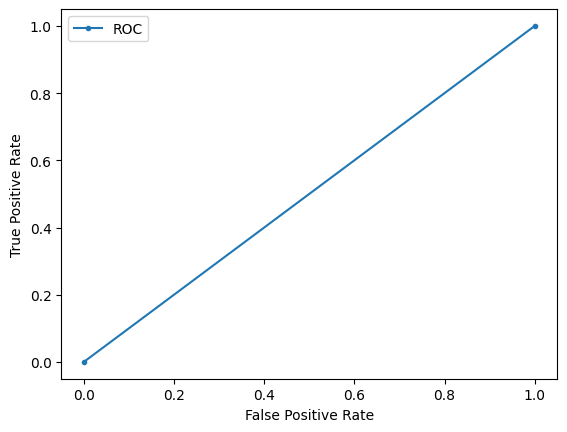

In [24]:

# roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [25]:
import generate_sub_model as gsm

In [26]:
new_model = gsm.genSubModel(chromosomes['57'][0], original_model)

In [27]:
new_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision', 'Recall'])

new_model.fit(x_train, y_train, epochs=20, verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
324/324 [==============================] - 6s 12ms/step - loss: 0.2071 - accuracy: 0.9160 - precision: 0.8555 - recall: 0.8142 - val_loss: 0.1849 - val_accuracy: 0.9290 - val_precision: 0.9167 - val_recall: 0.8086
Epoch 2/20
324/324 [==============================] - 3s 8ms/step - loss: 0.1153 - accuracy: 0.9581 - precision: 0.9160 - recall: 0.9234 - val_loss: 0.1372 - val_accuracy: 0.9502 - val_precision: 0.9044 - val_recall: 0.9103
Epoch 3/20
324/324 [==============================] - 3s 9ms/step - loss: 0.0856 - accuracy: 0.9679 - precision: 0.9354 - recall: 0.9417 - val_loss: 0.1175 - val_accuracy: 0.9560 - val_precision: 0.9125 - val_recall: 0.9243
Epoch 4/20
324/324 [==============================] - 3s 8ms/step - loss: 0.0700 - accuracy: 0.9747 - precision: 0.9527 - recall: 0.9498 - val_loss: 0.1234 - val_accuracy: 0.9609 - val_precision: 0.9478 - val_recall: 0.9038
Epoch 5/20
324/324 [==============================] - 3s 8ms/step - loss: 0.0535 - accuracy: 0.9804 - p

In [28]:
new_model.evaluate(x_test,y_test)

108/108 [==============================] - 0s 4ms/step - loss: 0.2006 - accuracy: 0.9635 - precision: 0.9264 - recall: 0.9384


[0.20062170922756195,
 0.9634994268417358,
 0.9263607263565063,
 0.9383783936500549]

In [29]:
y_pred = new_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall)

108/108 [==============================] - 0s 3ms/step
Recall: 0.732039
